# Projet n°3 - Anticipez les besoins en consommation électrique de bâtiments - partie 2 - modélisation et prévision de l'energie totale

### Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import math
import warnings
import time

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
warnings.filterwarnings('ignore')

### Importation des données

In [3]:
df = pd.read_csv("/home/fayz/Documents/OpenClassrooms/Projet3/prepared_data.csv")
y_full = pd.read_csv("/home/fayz/Documents/OpenClassrooms/Projet3/y.csv")

In [4]:
df.head()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,ENERGYSTARScore,Latitude,Longitude,BuildingType_Campus,BuildingType_Multifamily HR (10+),...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,7,1926,1.0,11.0,81352.0,25.0,47.614114,-122.332741,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7,1926,1.0,11.0,81352.0,27.0,47.613900,-122.332830,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7,1910,1.0,6.0,56132.0,2.0,47.602784,-122.332149,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,1910,1.0,6.0,56132.0,1.0,47.602840,-122.331840,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1961,1.0,2.0,58320.0,96.0,47.545701,-122.268584,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Mise de coté de l'energystarscore pour mesure de l'impact

In [947]:
ess = df['ENERGYSTARScore']
df.drop('ENERGYSTARScore', axis=1, inplace=True)

### Séparation des données

In [948]:
X = df.copy()

In [949]:
y=y_full['SiteEnergyUse(kBtu)']

In [950]:
y_log = y_full['SiteEnergyUse(kBtu)_log']

In [951]:
columns_to_standardized = ['CouncilDistrictCode','YearBuilt','NumberofFloors','LargestPropertyUseTypeGFA','Latitude','Longitude']
ss = StandardScaler()
X[columns_to_standardized] = ss.fit_transform(X[columns_to_standardized])

In [952]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  
                                         test_size = 0.2, 
                                         random_state = 20)

In [953]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X,y_log,  
                                         test_size = 0.2, 
                                         random_state = 20)

In [954]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

0
0
0
0


## Modélisation - Partie 1 - travail sans log

### Modèles de régression

#### Linear Regression

In [955]:
lr = LinearRegression().fit(X_train,y_train)

In [956]:
lr.coef_

array([ 1.37927605e+04,  9.69129262e+03, -2.94468135e+04,  1.75273224e+02,
        1.37997378e+05, -3.52687560e+04, -3.31666442e+04,  4.20618291e+17,
        2.99406283e+17,  4.20618291e+17,  4.20618291e+17,  4.20618291e+17,
        4.20618291e+17,  4.20618291e+17,  1.22754215e+17,  1.22754215e+17,
        2.43966223e+17,  1.22754215e+17,  1.22754215e+17,  1.22754215e+17,
        1.22754215e+17,  1.22754215e+17,  1.22754215e+17,  1.22754215e+17,
        1.22754215e+17,  1.22754215e+17,  1.30433639e+15,  1.22754215e+17,
        1.22754215e+17,  1.22754215e+17,  1.22754215e+17,  1.22754215e+17,
        1.22754215e+17,  1.22754215e+17,  1.22754215e+17,  1.22754215e+17,
        1.22754215e+17,  1.22754215e+17,  1.22754215e+17,  3.86604007e+17,
        3.86604007e+17,  3.86604007e+17,  3.86604007e+17,  3.86604007e+17,
        3.86604007e+17,  3.86604007e+17,  3.86604007e+17,  3.86604007e+17,
        3.86604007e+17,  3.86604007e+17,  3.86604007e+17,  3.86604007e+17,
        3.86604007e+17,  

In [957]:
lr.intercept_

-9.299765128373791e+17

In [958]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.02860760348045477
0.0020459826919186908


#### Ridge

In [959]:
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.02863906038521269
0.0012820896197980325


In [960]:
ridge1 = Ridge(alpha = 1).fit(X_train,y_train)
print(ridge1.score(X_train,y_train))
print(ridge1.score(X_test,y_test))

0.028326320918308223
0.0017209473724959512


In [961]:
ridge10 = Ridge(alpha = 10).fit(X_train,y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.025405067133540293
0.0013370054984617186


#### Lasso

In [962]:
lasso0001 = Lasso(alpha = 0.001, max_iter= 10000).fit(X_train,y_train)
print(lasso0001.score(X_train,y_train))
print(lasso0001.score(X_test,y_test))

0.028644971169347055
0.0011836776071960653


In [963]:
lasso001 = Lasso(alpha = 0.01, max_iter= 10000).fit(X_train,y_train)
print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))

0.02864497116857423
0.0011837090511463977


In [964]:
lasso01 = Lasso(alpha = 0.1, max_iter= 10000).fit(X_train,y_train)
print(lasso01.score(X_train,y_train))
print(lasso01.score(X_test,y_test))

0.028644971091901894
0.0011839997824671933


In [965]:
lasso1 = Lasso(alpha = 1, max_iter= 10000).fit(X_train,y_train)
print(lasso1.score(X_train,y_train))
print(lasso1.score(X_test,y_test))

0.028644965669529232
0.0011865360391490887


In [966]:
lasso10 = Lasso(alpha = 10, max_iter= 10000).fit(X_train,y_train)
print(lasso10.score(X_train,y_train))
print(lasso10.score(X_test,y_test))

0.028644437949776225
0.001210111200242836


#### Sélection de modèle

On stock les résultats de nos modèles dans le tableau "results"

In [967]:
results = pd.DataFrame({})

In [968]:
a = time.time()

In [969]:
parameters = {'tol' : [0.1,0.01,0.001],
              "alpha": [0.001, 0.01, 0.1],  #alpha, coef pénalité
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 Lasso, 0 Ridge


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [970]:
b = time.time()

In [971]:
b-a

205.80611944198608

In [972]:
elastic_grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1, 'tol': 0.1}

In [973]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

#### Visualisation

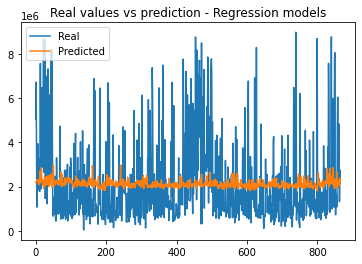

In [974]:
plt.title("Real values vs prediction - Regression models")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)'], label = "Real")
plt.plot(elastic_grid.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

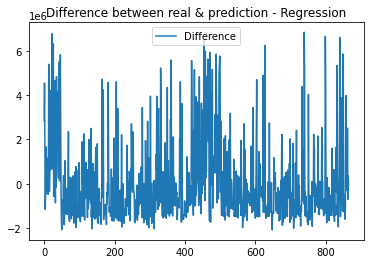

In [975]:
plt.title("Difference between real & prediction - Regression")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)']-elastic_grid.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [976]:
a = time.time()

In [977]:
parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],  #alpha, coef pénalité
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 Lasso, 0 Ridge


elastic_grid2 = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid2.fit(X_train, y_train_log)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [978]:
b = time.time()

In [979]:
b-a

110.50606942176819

In [980]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(np.exp(elastic_grid2.predict(X_test))-1, y_test))]}),
              ignore_index=True)

### Random forest

In [981]:
parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [982]:
rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.9s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   5.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   5.2s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.9s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.9s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.1s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.1s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [983]:
rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 500}

In [984]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

In [985]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

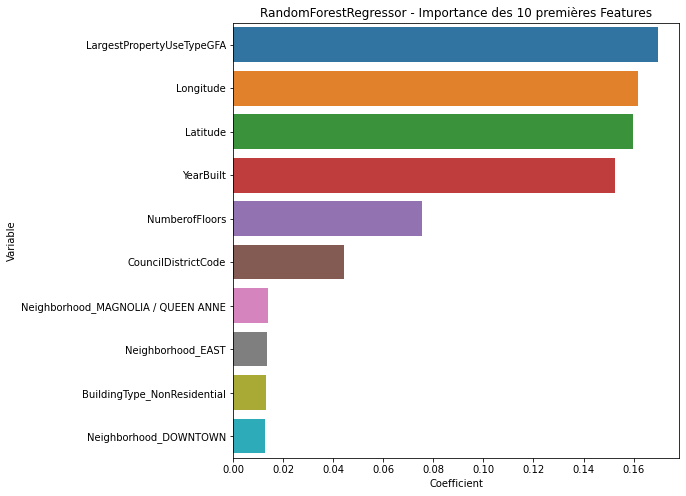

In [986]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 10 premières Features')
sb.barplot(y = liste_coefs_rer['Variable'].head(10),
            x = liste_coefs_rer['Coefficient'].head(10))
plt.show()

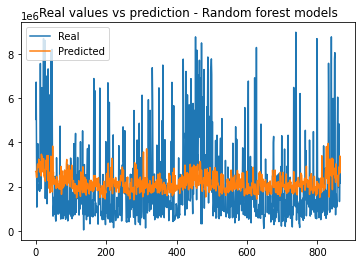

In [987]:
plt.title("Real values vs prediction - Random forest models")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)'], label = "Real")
plt.plot(rfr_search.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

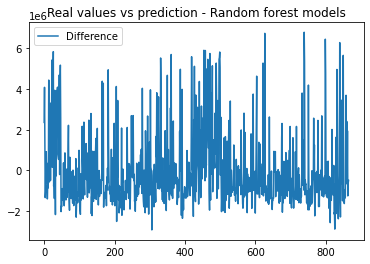

In [988]:
plt.title("Real values vs prediction - Random forest models")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)']-rfr_search.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [989]:
parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search2 = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

rfr_search2.fit(X_train, y_train_log)

results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor (with log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(np.exp(rfr_search2.predict(X_test))-1, y_test))]}),
              ignore_index=True)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.8s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   5.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   5.1s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   5.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.9s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.5s


### SVR

In [990]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001

[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0

[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................

[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]},
             verbose=2)

In [991]:
svm.best_params_

{'C': 1, 'epsilon': 0.001, 'gamma': 0.001}

In [992]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

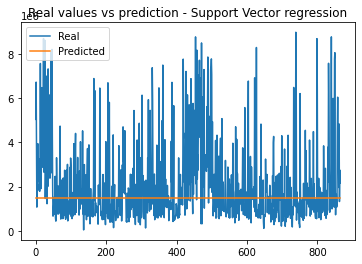

In [993]:
plt.title("Real values vs prediction - Support Vector regression")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)'], label = "Real")
plt.plot(svm.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

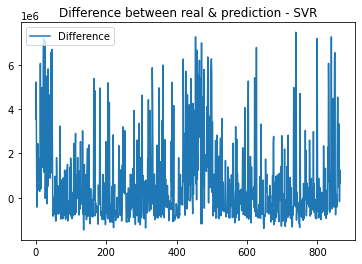

In [994]:
plt.title("Difference between real & prediction - SVR")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)']-svm.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [995]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1]} #parametre de régularisation

svm2 = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      cv=5,
                   verbose=2
                     )

svm2.fit(X_train, y_train_log)
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine(with log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(np.exp(svm2.predict(X_test))-1, y_test))]}),
              ignore_index=True)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.7s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.7s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001

[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0

[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................

[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.7s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.7s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.8s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ...................

## XG Boost 

In [996]:
parameters = {
    'n_estimators' : [40,50,60,100,200,500]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................n_estimators=40;, score=-0.049 total time=   0.4s
[CV 2/5] END ..................n_estimators=40;, score=-0.014 total time=   0.4s
[CV 3/5] END ..................n_estimators=40;, score=-0.211 total time=   0.3s
[CV 4/5] END ..................n_estimators=40;, score=-0.018 total time=   0.4s
[CV 5/5] END ..................n_estimators=40;, score=-0.007 total time=   0.2s
[CV 1/5] END ..................n_estimators=50;, score=-0.083 total time=   0.3s
[CV 2/5] END ..................n_estimators=50;, score=-0.030 total time=   0.3s
[CV 3/5] END ..................n_estimators=50;, score=-0.245 total time=   0.5s
[CV 4/5] END ..................n_estimators=50;, score=-0.046 total time=   0.3s
[CV 5/5] END ..................n_estimators=50;, score=-0.028 total time=   0.2s
[CV 1/5] END ..................n_estimators=60;, score=-0.103 total time=   0.4s
[CV 2/5] END ..................n_estimators=60;, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [997]:
xgb_grid.best_params_

{'n_estimators': 40}

In [998]:
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

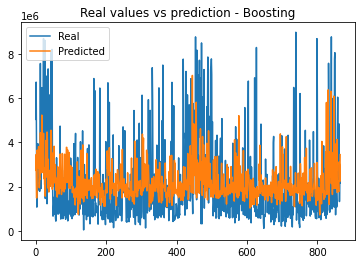

In [999]:
plt.title("Real values vs prediction - Boosting")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)'], label = "Real")
plt.plot(xgb_grid.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

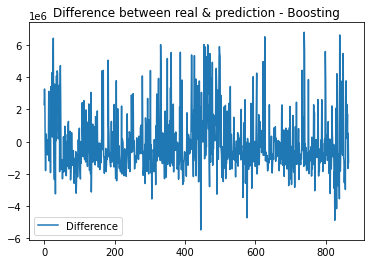

In [1000]:
plt.title("Difference between real & prediction - Boosting")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)']-xgb_grid.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [1002]:
parameters = {
    'n_estimators' : [40,50,60,100,200,500]
}

xgb_grid2 = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        cv = 5,
                        verbose=5)
xgb_grid2.fit(X_train, y_train_log)

results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost (with log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(np.exp(xgb_grid2.predict(X_test))-1, y_test))]}),
              ignore_index=True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................n_estimators=40;, score=-0.085 total time=   0.3s
[CV 2/5] END ...................n_estimators=40;, score=0.022 total time=   0.2s
[CV 3/5] END ..................n_estimators=40;, score=-0.089 total time=   0.2s
[CV 4/5] END ..................n_estimators=40;, score=-0.042 total time=   0.2s
[CV 5/5] END ..................n_estimators=40;, score=-0.045 total time=   0.2s
[CV 1/5] END ..................n_estimators=50;, score=-0.118 total time=   0.4s
[CV 2/5] END ...................n_estimators=50;, score=0.004 total time=   0.2s
[CV 3/5] END ..................n_estimators=50;, score=-0.098 total time=   0.2s
[CV 4/5] END ..................n_estimators=50;, score=-0.045 total time=   0.2s
[CV 5/5] END ..................n_estimators=50;, score=-0.058 total time=   0.2s
[CV 1/5] END ..................n_estimators=60;, score=-0.140 total time=   0.3s
[CV 2/5] END ..................n_estimators=60;, 

### Résultats compilés pour comparaison

In [1003]:
results['RMSE_%'] = results['Score_RMSE'].divide(y_test.mean())

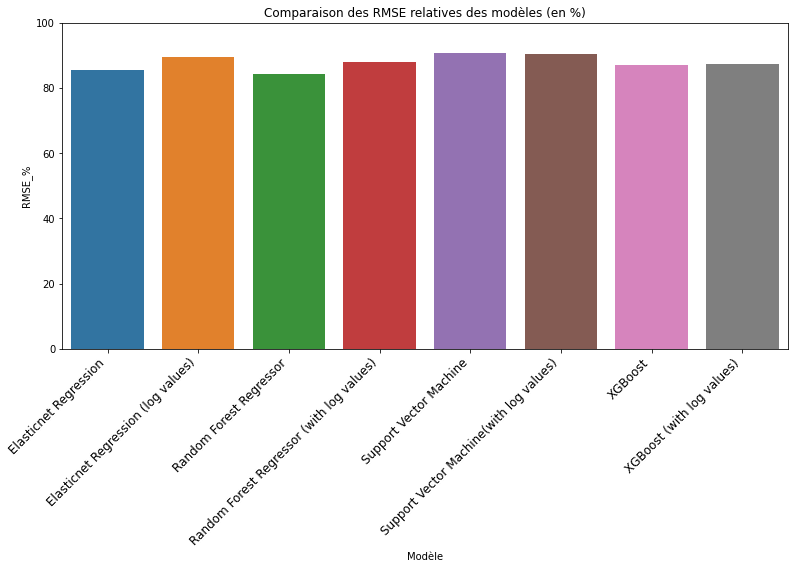

In [1004]:
plt.figure(figsize=(13,6))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sb.barplot(x = results['Modèle'],
           y = results['RMSE_%']*100)
chart.set_xticklabels(labels = results['Modèle'], 
                            rotation=45,
                     horizontalalignment='right',
                     size=12
                     )
ax = plt.gca()
ax.set_ylim([0, 100])
plt.show()

## Modélisation - Partie 2 - travail avec log - travail sans l'energystarscore pour comparaison

In [1005]:
results1 = pd.DataFrame({})

### Regression

In [1006]:
parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],  #alpha, coef pénalité
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 Lasso, 0 Ridge


elastic_grid2 = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid2.fit(X_train, y_train_log)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [1007]:
results1 = results1.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid2.predict(X_test), y_test_log))]}),
              ignore_index=True)

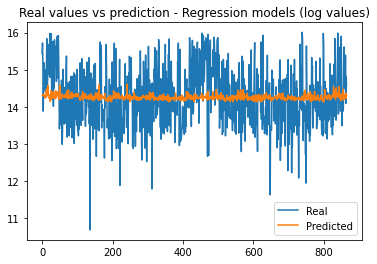

In [1008]:
plt.title("Real values vs prediction - Regression models (log values)")
plt.plot(y_test_log.sort_index().reset_index()['SiteEnergyUse(kBtu)_log'], label = "Real")
plt.plot(elastic_grid2.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

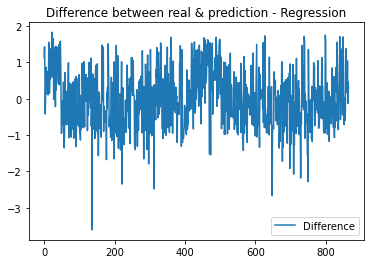

In [1009]:
plt.title("Difference between real & prediction - Regression")
plt.plot(y_test_log.sort_index().reset_index()['SiteEnergyUse(kBtu)_log']-elastic_grid2.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

### RandomForest

In [1010]:
parameters = {
    'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search2 = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

rfr_search2.fit(X_train, y_train_log)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   2.1s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.7s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   5.1s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   5.2s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   5.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.1s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.2s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [1011]:
rfr_search2.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 300}

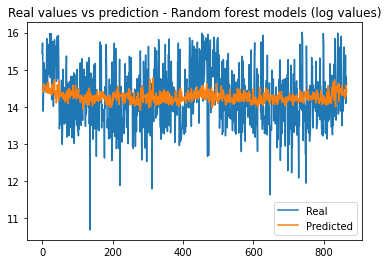

In [1012]:
plt.title("Real values vs prediction - Random forest models (log values)")
plt.plot(y_test_log.sort_index().reset_index()['SiteEnergyUse(kBtu)_log'], label = "Real")
plt.plot(rfr_search2.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

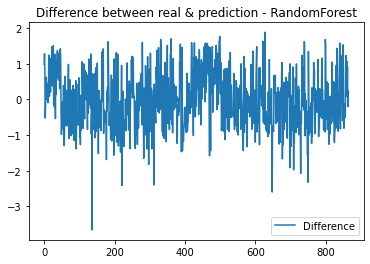

In [1013]:
plt.title("Difference between real & prediction - RandomForest")
plt.plot(y_test_log.sort_index().reset_index()['SiteEnergyUse(kBtu)_log']-rfr_search2.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [1014]:
results1 = results1.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search2.predict(X_test), y_test_log))]}),
              ignore_index=True)

### SVR

In [1015]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1]} #parametre de régularisation

svm2 = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      cv=5,
                   verbose=2
                     )

svm2.fit(X_train, y_train_log)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001

[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0

[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................

[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]},
             verbose=2)

In [1016]:
results1 = results1.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm2.predict(X_test), y_test_log))]}),
              ignore_index=True)

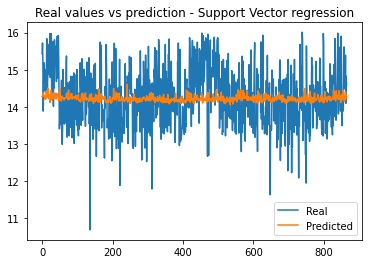

In [1017]:
plt.title("Real values vs prediction - Support Vector regression")
plt.plot(y_test_log.sort_index().reset_index()['SiteEnergyUse(kBtu)_log'], label = "Real")
plt.plot(svm2.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

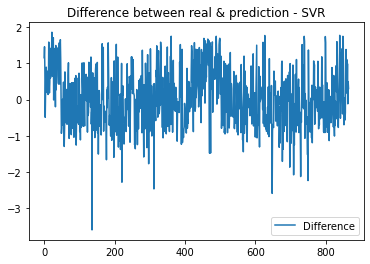

In [1018]:
plt.title("Difference between real & prediction - SVR")
plt.plot(y_test_log.sort_index().reset_index()['SiteEnergyUse(kBtu)_log']-svm2.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

### XGB

In [1019]:
parameters = {
    'n_estimators' : [40,50,60,100,200,500]
}
xgb_grid2 = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        cv = 5,
                        verbose=5)
xgb_grid2.fit(X_train, y_train_log)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................n_estimators=40;, score=-0.085 total time=   0.3s
[CV 2/5] END ...................n_estimators=40;, score=0.022 total time=   0.4s
[CV 3/5] END ..................n_estimators=40;, score=-0.089 total time=   0.4s
[CV 4/5] END ..................n_estimators=40;, score=-0.042 total time=   0.4s
[CV 5/5] END ..................n_estimators=40;, score=-0.045 total time=   0.2s
[CV 1/5] END ..................n_estimators=50;, score=-0.118 total time=   0.2s
[CV 2/5] END ...................n_estimators=50;, score=0.004 total time=   0.3s
[CV 3/5] END ..................n_estimators=50;, score=-0.098 total time=   0.3s
[CV 4/5] END ..................n_estimators=50;, score=-0.045 total time=   0.3s
[CV 5/5] END ..................n_estimators=50;, score=-0.058 total time=   0.2s
[CV 1/5] END ..................n_estimators=60;, score=-0.140 total time=   0.3s
[CV 2/5] END ..................n_estimators=60;, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [1020]:
results1 = results1.append(pd.DataFrame({
    'Modèle' : ['XGBoost (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid2.predict(X_test), y_test_log))]}),
              ignore_index=True)

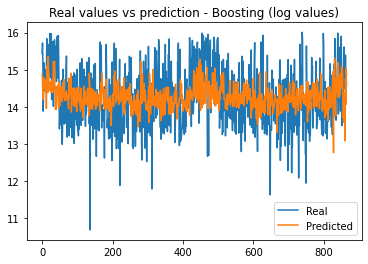

In [1021]:
plt.title("Real values vs prediction - Boosting (log values)")
plt.plot(y_test_log.sort_index().reset_index()['SiteEnergyUse(kBtu)_log'], label = "Real")
plt.plot(xgb_grid2.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

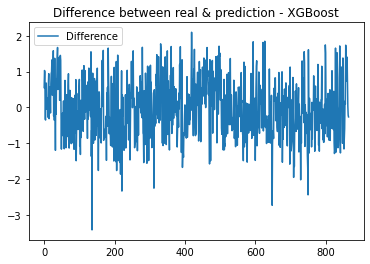

In [1022]:
plt.title("Difference between real & prediction - XGBoost")
plt.plot(y_test_log.sort_index().reset_index()['SiteEnergyUse(kBtu)_log']-xgb_grid2.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [1060]:
results1['RMSE_%'] = results1['Score_RMSE'].divide(y_test_log.mean())

In [1061]:
results1

,Modèle,Score_RMSE,RMSE_%
0,Elasticnet Regression (log values),0.796688,0.055892
1,Random Forest Regressor (log values),0.788281,0.055302
2,Support Vector Machine (log values),0.797428,0.055944
3,XGBoost (log values),0.800754,0.056177


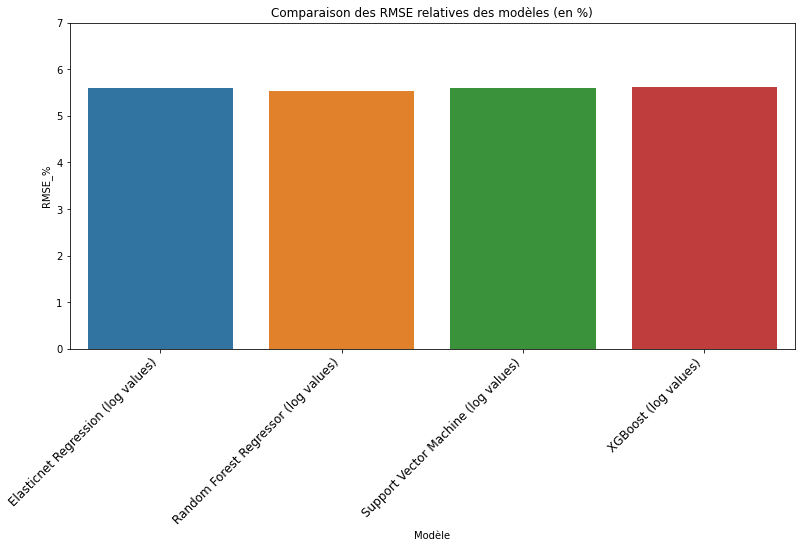

In [1062]:
plt.figure(figsize=(13,6))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sb.barplot(x = results1['Modèle'],
           y = results1['RMSE_%']*100)
chart.set_xticklabels(labels = results1['Modèle'], 
                            rotation=45,
                     horizontalalignment='right',
                     size=12
                     )
ax = plt.gca()
ax.set_ylim([0, 7])
plt.show()

## Modélisation - Partie 3 - travail avec log - travail avec l'energystarscore pour comparaison

### Modèles de régression

#### Linear Regression

In [1025]:
y = y_full['SiteEnergyUse(kBtu)_log']

In [1026]:
df = pd.read_csv("/home/fayz/Documents/OpenClassrooms/Projet3/prepared_data.csv")
X = df.copy()
columns_to_standardized = ['CouncilDistrictCode','YearBuilt','NumberofFloors','LargestPropertyUseTypeGFA','Latitude','Longitude']
ss = StandardScaler()
X[columns_to_standardized] = ss.fit_transform(X[columns_to_standardized])
X_train, X_test, y_train, y_test = train_test_split(X,y,  
                                         test_size = 0.2, 
                                         random_state = 20)

In [1027]:
lr = LinearRegression().fit(X_train,y_train)

lr.coef_

array([-1.60487452e-03,  4.05846986e-03, -7.30260391e-04,  2.77836839e-03,
        5.55460187e-02, -1.48306630e-04, -1.72883402e-02, -2.12447935e-02,
        4.51718222e-01, -3.62361207e-02, -2.28507912e-01, -2.99199166e-01,
       -1.05411672e-01,  1.51415766e-01,  6.62208820e-02, -5.31018223e-02,
       -1.40787484e-01, -3.62361207e-02, -2.68045676e-01, -6.04716048e-02,
       -7.05209600e-02,  8.81273633e-02,  4.94713934e-02, -2.20957795e-01,
        7.25595202e-02, -1.45456180e-01,  9.90105708e-02, -2.25514052e-16,
       -2.64898615e-01, -3.67479604e-01, -2.20781640e-01,  2.59474777e-01,
       -1.30878060e-01,  1.11867541e+00, -1.79592251e-01, -1.53388829e-01,
        4.41102177e-01,  5.68963632e-01, -1.82231577e-01, -2.02556621e-01,
       -4.45976655e-02, -7.52109913e-01,  4.46919254e-02, -3.77289576e-01,
       -8.88729349e-02,  8.37163977e-02,  4.79514200e-01,  1.24112489e-02,
        1.85352885e-02,  1.05514764e-01,  8.39739121e-02,  1.40945887e-01,
        4.05441110e-02,  

In [1028]:
lr.intercept_

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.029467897297614676
-0.003925320295402601


#### Ridge

In [1029]:
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))
print()
ridge1 = Ridge(alpha = 1).fit(X_train,y_train)
print(ridge1.score(X_train,y_train))
print(ridge1.score(X_test,y_test))
print()
ridge10 = Ridge(alpha = 10).fit(X_train,y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.029463110536033343
-0.003751203215222043

0.02919588349722324
-0.0027261332649761716

0.026077851602600566
-0.001037806073779457


#### Lasso

In [1030]:
lasso0001 = Lasso(alpha = 0.001, max_iter= 100000).fit(X_train,y_train)
print(lasso0001.score(X_train,y_train))
print(lasso0001.score(X_test,y_test))
print()
lasso001 = Lasso(alpha = 0.01, max_iter= 100000).fit(X_train,y_train)
print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))
print()
lasso01 = Lasso(alpha = 0.1, max_iter= 100000).fit(X_train,y_train)
print(lasso01.score(X_train,y_train))
print(lasso01.score(X_test,y_test))
print()
lasso1 = Lasso(alpha = 1, max_iter= 100000).fit(X_train,y_train)
print(lasso1.score(X_train,y_train))
print(lasso1.score(X_test,y_test))
print()
lasso10 = Lasso(alpha = 10, max_iter= 100000).fit(X_train,y_train)
print(lasso10.score(X_train,y_train))
print(lasso10.score(X_test,y_test))


0.021238325271744074
0.0018354345182856058

0.007178013405394257
0.0014454956203239222

0.0
-4.4405374827416466e-05

0.0
-4.4405374827416466e-05

0.0
-4.4405374827416466e-05


#### Sélection de modèle

In [1031]:
results2 = pd.DataFrame({})

parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

In [1032]:
elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [1033]:
elastic_grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.1}

In [1034]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

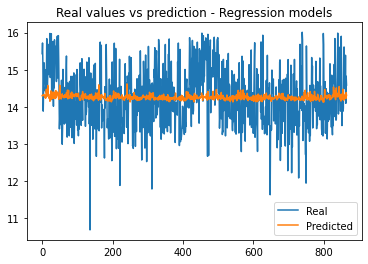

In [1035]:
plt.title("Real values vs prediction - Regression models")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)_log'], label = "Real")
plt.plot(elastic_grid.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

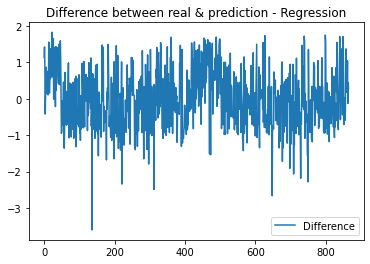

In [1036]:
plt.title("Difference between real & prediction - Regression")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)_log']-elastic_grid.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

### Random forest

In [1037]:
parameters = {
    'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

In [1038]:
rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   2.1s
[CV] END max_

[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.5s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.5s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total ti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300]},
             verbose=2)

In [1039]:
rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 300}

In [1040]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

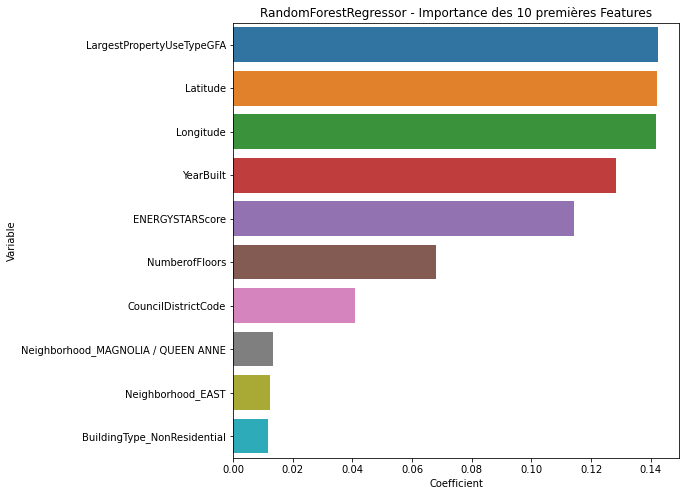

In [1041]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 10 premières Features')
sb.barplot(y = liste_coefs_rer['Variable'].head(10),
            x = liste_coefs_rer['Coefficient'].head(10))
plt.show()

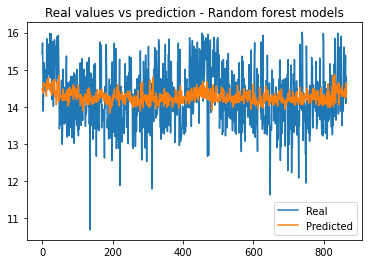

In [1042]:
plt.title("Real values vs prediction - Random forest models")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)_log'], label = "Real")
plt.plot(rfr_search.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

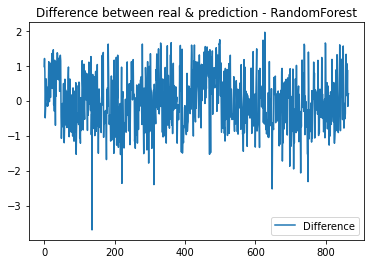

In [1043]:
plt.title("Difference between real & prediction - RandomForest")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)_log']-rfr_search.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

### SVR

In [1044]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      cv=5,
                   verbose=2
                     )

In [1045]:
svm.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.7s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001

[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ................C=0

[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.7s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.7s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.7s
[CV] END ...................

[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]},
             verbose=2)

In [1046]:
svm.best_params_

{'C': 1, 'epsilon': 0.001, 'gamma': 0.0001}

In [1047]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

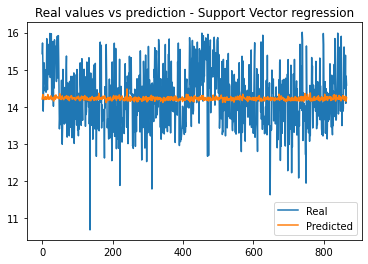

In [1048]:
plt.title("Real values vs prediction - Support Vector regression")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)_log'], label = "Real")
plt.plot(svm.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

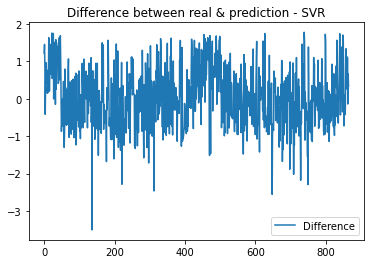

In [1049]:
plt.title("Difference between real & prediction - SVR")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)_log']-svm.predict(X_test.sort_index()), label = "Difference")
#plt.plot(svm.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

### XGBoost

In [1050]:
parameters = {
    'n_estimators' : [100,500,1000]}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................n_estimators=100;, score=-0.170 total time=   0.8s
[CV 2/5] END .................n_estimators=100;, score=-0.069 total time=   0.8s
[CV 3/5] END .................n_estimators=100;, score=-0.174 total time=   0.5s
[CV 4/5] END .................n_estimators=100;, score=-0.128 total time=   0.6s
[CV 5/5] END .................n_estimators=100;, score=-0.117 total time=   0.5s
[CV 1/5] END .................n_estimators=500;, score=-0.293 total time=   2.3s
[CV 2/5] END .................n_estimators=500;, score=-0.160 total time=   2.5s
[CV 3/5] END .................n_estimators=500;, score=-0.287 total time=   2.5s
[CV 4/5] END .................n_estimators=500;, score=-0.243 total time=   2.4s
[CV 5/5] END .................n_estimators=500;, score=-0.239 total time=   2.3s
[CV 1/5] END ................n_estimators=1000;, score=-0.299 total time=   4.7s
[CV 2/5] END ................n_estimators=1000;, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [1051]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

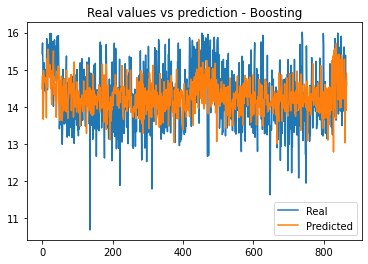

In [1052]:
plt.title("Real values vs prediction - Boosting")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)_log'], label = "Real")
plt.plot(xgb_grid.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

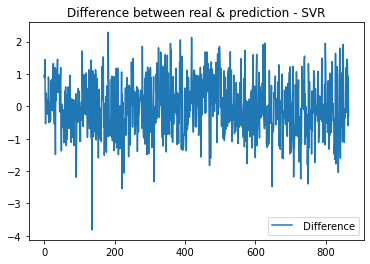

In [1053]:
plt.title("Difference between real & prediction - Boosting")
plt.plot(y_test.sort_index().reset_index()['SiteEnergyUse(kBtu)_log']-xgb_grid.predict(X_test.sort_index()), label =" Difference")
#plt.plot(, label = "Predicted")
plt.legend()
plt.show()

In [1054]:
results2['RMSE_%'] = results2['Score_RMSE'].divide(y_test.mean())

In [1055]:
results2

,Modèle,Score_RMSE,RMSE_%
0,Elasticnet Regression,0.796593,0.055886
1,Random Forest Regressor,0.785139,0.055082
2,Support Vector Machine,0.796921,0.055908
3,XGBoost,0.846918,0.059416


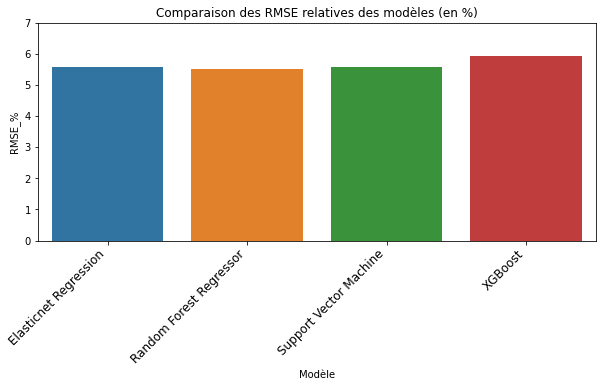

In [1056]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sb.barplot(x = results2['Modèle'],
           y = results2['RMSE_%']*100)
chart.set_xticklabels(labels = results2['Modèle'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 7])
plt.show()